In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_url="./electricity_cost_dataset.csv"
df = pd.read_csv(data_url)
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [4]:
#One hot encoding for "structure type" field
df_encoded = pd.get_dummies(df, columns=['structure type'], drop_first=True)
df_encoded.head()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,False,True,False
1,4272,2324.0,50,76,165,65,261,3298.0,False,True,False
2,3592,2701.0,20,94,198,39,117,3115.0,False,True,False
3,966,1000.0,13,60,74,3,35,1575.0,False,False,True
4,4926,5990.0,23,65,32,57,185,4301.0,False,False,True


In [ ]:
# --- Loss function ---
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

***Gradient Descent***

In [ ]:
losses = []

# --- Gradient Descent ---
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    
    for _ in range(n_iterations):
        y_pred = X.dot(theta)
        gradient = -2/m * X.T.dot(y - y_pred)
        theta -= learning_rate * gradient
        losses.append(loss_function(y, y_pred))
        if (_ + 1) % 1000 == 0:  # Print loss every 1000 iterations
            print(f"Epoch {_+1}/{n_iterations}, Loss: {losses[-1]}")
    return theta

# --- Predict ---
def predict(X, theta):
    return X.dot(theta)

# --- Data Preparing ---
X = df_encoded.drop('electricity cost', axis=1).to_numpy(dtype=float)
y = df_encoded['electricity cost'].to_numpy(dtype=float)

X = np.c_[np.ones(X.shape[0]), X]

# Training the model
theta = gradient_descent(X, y, learning_rate=0.000000001, n_iterations=10000000)

print("Trained parameters (theta):", theta)

Epoch 1000/10000000, Loss: 402060.8146161295
Epoch 2000/10000000, Loss: 382411.33247028984
Epoch 3000/10000000, Loss: 379525.64756948466
Epoch 4000/10000000, Loss: 377646.39895467414
Epoch 5000/10000000, Loss: 375860.6341196941
Epoch 6000/10000000, Loss: 374114.6531090381
Epoch 7000/10000000, Loss: 372404.5140410729
Epoch 8000/10000000, Loss: 370729.17702178395
Epoch 9000/10000000, Loss: 369087.7913873528
Epoch 10000/10000000, Loss: 367479.53808551905
Epoch 11000/10000000, Loss: 365903.619972543
Epoch 12000/10000000, Loss: 364359.2606894228
Epoch 13000/10000000, Loss: 362845.7040516743
Epoch 14000/10000000, Loss: 361362.21348526323
Epoch 15000/10000000, Loss: 359908.07148109924
Epoch 16000/10000000, Loss: 358482.5790659814
Epoch 17000/10000000, Loss: 357085.05528937647
Epoch 18000/10000000, Loss: 355714.83672551386
Epoch 19000/10000000, Loss: 354371.2769903036
Epoch 20000/10000000, Loss: 353053.7462726035
Epoch 21000/10000000, Loss: 351761.6308793736
Epoch 22000/10000000, Loss: 350494.

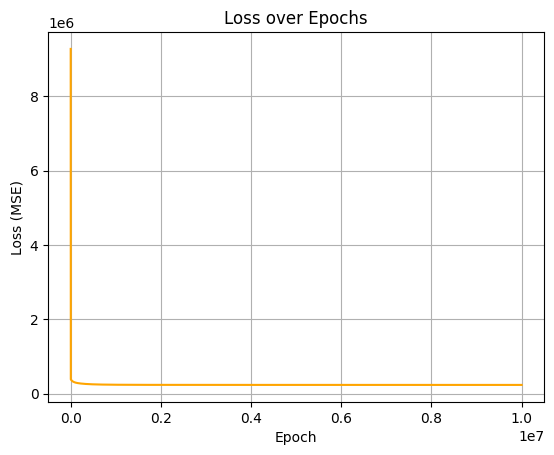

In [20]:
plt.plot(range(len(losses)), losses, color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

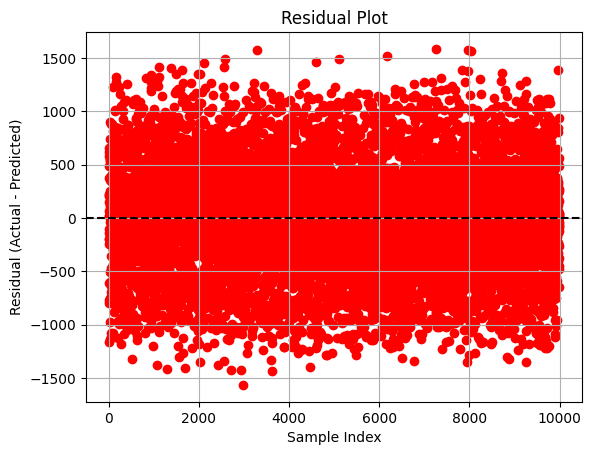

In [12]:
residuals = y - y_pred
plt.scatter(range(len(residuals)), residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [14]:
#print max residual anf y pred y at that index
max_residual_index = np.argmax(np.abs(residuals))
print(f"Max Residual Index: {max_residual_index}, Max Residual: {residuals[max_residual_index]}, Predicted Value: {y_pred[max_residual_index]}, True Value: {y[max_residual_index]}")

Max Residual Index: 7268, Max Residual: 1584.8180130469536, Predicted Value: 4358.181986953046, True Value: 5943.0


***SK Learn***

MSE: 97381.90
RMSE: 312.06
R² Score: 0.9219


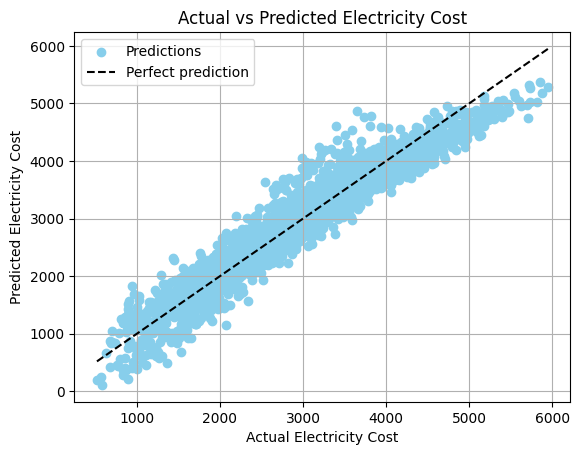

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop('electricity cost', axis=1)
y = df_encoded['electricity cost']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.scatter(y_test, y_pred, color='skyblue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect prediction')
plt.xlabel('Actual Electricity Cost')
plt.ylabel('Predicted Electricity Cost')
plt.title('Actual vs Predicted Electricity Cost')
plt.legend()
plt.grid(True)
plt.show()

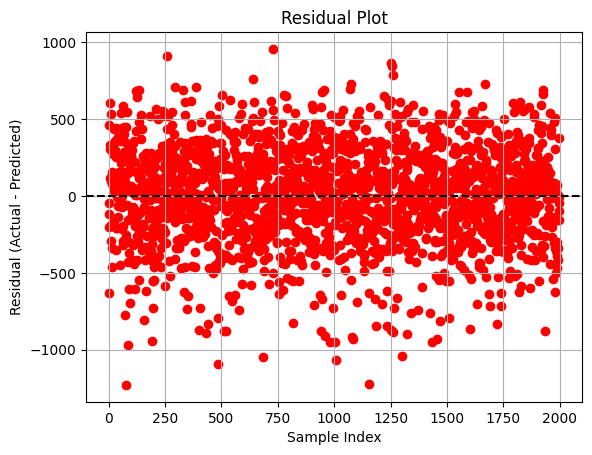

In [23]:
residuals = y_test - y_pred
plt.scatter(range(len(residuals)), residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()